MODELOS DE Feed Forward NN PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO

https://github.com/bnsreenu/python_for_microscopists/blob/master/164b-Intro_to_time_series_Forecasting_using_feed_forward_NN_and_TimeseriesGenerator.py

https://github.com/bnsreenu/python_for_microscopists/tree/master

https://www.youtube.com/watch?v=tKM5d8Ll1k0


Importamos la data de Demanda de gas en sector eléctrico como un CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_demanda_electrico_original = pd.read_csv('Demanda_electrico_2022_full1.csv',index_col='Date',parse_dates=True)
csv_demanda_electrico_original

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2022-05-01,3350.03
2022-06-01,3498.70
2022-07-01,3350.97


Vamos a graficar los datos "originales" de demanda eléctrico desde 2005 hasta 2022

Text(0, 0.5, 'Demanda [MMpcd]')

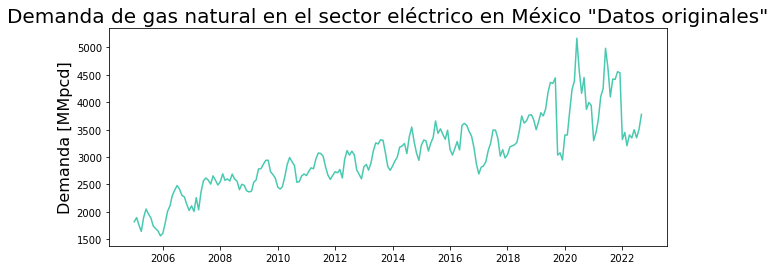

In [3]:
plt.figure(figsize=(10,4))
plt.plot(csv_demanda_electrico_original, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Vamos a descomponer la serie de tiempo de datos "originales" de demanda eléctrico desde 2005 hasta 2022 en sus compoentes de Tendencia, Estacionalidad y Residual 

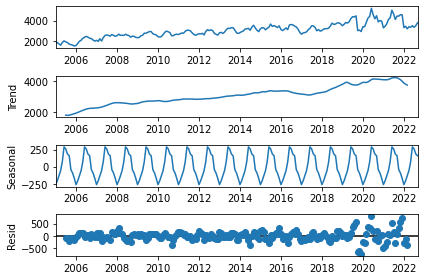

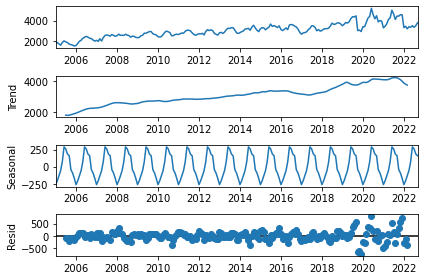

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

csv_demanda_electrico_original_seasonal_decomposition = seasonal_decompose(csv_demanda_electrico_original)
csv_demanda_electrico_original_seasonal_decomposition.plot()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [5]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
csv_demanda_electrico_original_train_data = csv_demanda_electrico_original[:-num_test_points]
csv_demanda_electrico_original_test_data = csv_demanda_electrico_original[-num_test_points:]

csv_demanda_electrico_original_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


Para la aplicación de RNN(LSTM) combiene escalar la data. Por lo que se define y entrena el MinMaxScaler (con la data de train)

In [6]:
from sklearn.preprocessing import MinMaxScaler
MinMax_scaler = MinMaxScaler()
MinMax_scaler.fit(csv_demanda_electrico_original_train_data)

MinMaxScaler()

Se aplica la escalación de data a la data de train y test 

In [7]:
csv_demanda_electrico_scaled_train = MinMax_scaler.transform(csv_demanda_electrico_original_train_data)
csv_demanda_electrico_scaled_test = MinMax_scaler.transform(csv_demanda_electrico_original_test_data)
csv_demanda_electrico_scaled_train

array([[0.07168816],
       [0.09268731],
       [0.0567961 ],
       [0.02265413],
       [0.09274552],
       [0.13604118],
       [0.11118319],
       [0.09111549],
       [0.04937779],
       [0.03740758],
       [0.02438673],
       [0.        ],
       [0.0137139 ],
       [0.06801505],
       [0.1236108 ],
       [0.15172886],
       [0.20456354],
       [0.23227963],
       [0.2549393 ],
       [0.23621611],
       [0.20444988],
       [0.1976359 ],
       [0.15896421],
       [0.12890563],
       [0.15187856],
       [0.12359139],
       [0.19350815],
       [0.13185522],
       [0.2219949 ],
       [0.27894624],
       [0.2931425 ],
       [0.28230888],
       [0.26220515],
       [0.30390127],
       [0.28192632],
       [0.25737049],
       [0.27370963],
       [0.31419986],
       [0.28129981],
       [0.28810548],
       [0.27775144],
       [0.31287199],
       [0.28763698],
       [0.27746314],
       [0.23393184],
       [0.26135964],
       [0.25557967],
       [0.228

When using a NN for multi-step time series forecasting there are two main approaches to take: 
a) Direct Multi-Step Forecast:Prefict all future time steps directly using a single Dense output layer.
b) Auto-Regresive Prediction: Predict one step at a time and feed the predicted value back into the model to predict the next step
Source: Spencer Pao, RNN Appliying Understanding Recurrent NN in Python 

Se generan sets de n_input datos para con ellos predecir el t+1 dato, y así los siguientes n_input para predecir el t+1, etc 

In [8]:
from keras.preprocessing.sequence import TimeseriesGenerator

Se aplica el TimeseriesGnerator para producir sets de n_inputs + 1 output para el caso de

In [9]:
# We do the same thing, but now instead for 12 months
n_input = 24
demanda_electrico_scaled_train_generator = TimeseriesGenerator(csv_demanda_electrico_scaled_train, csv_demanda_electrico_scaled_train, length=n_input, batch_size=1)
demanda_electrico_scaled_train_generator

De tal manera que se toman por ejemplos los primeros n_input elementos del array csv_demanda_electrico_scaled_train y se deja el siguiente elemento n_input + 1 como "output" 

In [10]:
demanda_electrico_scaled_train_generator[0]

(array([[[0.07168816],
         [0.09268731],
         [0.0567961 ],
         [0.02265413],
         [0.09274552],
         [0.13604118],
         [0.11118319],
         [0.09111549],
         [0.04937779],
         [0.03740758],
         [0.02438673],
         [0.        ],
         [0.0137139 ],
         [0.06801505],
         [0.1236108 ],
         [0.15172886],
         [0.20456354],
         [0.23227963],
         [0.2549393 ],
         [0.23621611],
         [0.20444988],
         [0.1976359 ],
         [0.15896421],
         [0.12890563]]]),
 array([[0.15187856]]))

In [11]:
demanda_electrico_scaled_train_generator[1]

(array([[[0.09268731],
         [0.0567961 ],
         [0.02265413],
         [0.09274552],
         [0.13604118],
         [0.11118319],
         [0.09111549],
         [0.04937779],
         [0.03740758],
         [0.02438673],
         [0.        ],
         [0.0137139 ],
         [0.06801505],
         [0.1236108 ],
         [0.15172886],
         [0.20456354],
         [0.23227963],
         [0.2549393 ],
         [0.23621611],
         [0.20444988],
         [0.1976359 ],
         [0.15896421],
         [0.12890563],
         [0.15187856]]]),
 array([[0.12359139]]))

Y entonces el numero de muestras formadas con el TimeseriesGenerator = Numero de elementos de array original - n_input

In [12]:
print("Total number of samples in the original training data = ", len(csv_demanda_electrico_scaled_train)) 
print("Total number of samples in the demanda_electrico_scaled_train_generator = ", len(demanda_electrico_scaled_train_generator))

Total number of samples in the original training data =  201
Total number of samples in the demanda_electrico_scaled_train_generator =  177


In [37]:
X,y = demanda_electrico_scaled_train_generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.07168816 0.09268731 0.0567961  0.02265413 0.09274552 0.13604118
 0.11118319 0.09111549 0.04937779 0.03740758 0.02438673 0.
 0.0137139  0.06801505 0.1236108  0.15172886 0.20456354 0.23227963
 0.2549393  0.23621611 0.20444988 0.1976359  0.15896421 0.12890563]
Predict this y: 
 [[0.15187856]]


In [38]:
X,y = demanda_electrico_scaled_train_generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.09268731 0.0567961  0.02265413 0.09274552 0.13604118 0.11118319
 0.09111549 0.04937779 0.03740758 0.02438673 0.         0.0137139
 0.06801505 0.1236108  0.15172886 0.20456354 0.23227963 0.2549393
 0.23621611 0.20444988 0.1976359  0.15896421 0.12890563 0.15187856]
Predict this y: 
 [[0.12359139]]


Se importan las librerias necesarias para definir la red Neuronal de tipo Feed Forward Sequential Neural Network

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Se define la red neuronal sequencial FFNN con capas densas y funcion de activación tipo RELU. 

La primer cada Dense constará de N, nodos y n_input inputs.
Por lo que el número de parámetros a estimar para esta primer capa sería 
Parámetros_n_capa_densa = n_input *  #Nodos + # Nodos
Donde  n_input *  #Nodos: Representa la matriz de pesos 
Y # Nodos: el vector de bias  


Note: By setting input_shape=(n_input, n_features) in the first Dense layer, you're correctly specifying that each input sample will have a shape of (24, 1), which matches the shape of the data generated by your TimeseriesGenerator.

In [24]:
n_input = 24
n_features = 1

# define model
model_sequential_and_FF = Sequential()
model_sequential_and_FF.add(Dense(64, activation='relu', input_shape=(n_input, n_features)))
model_sequential_and_FF.add(Dense(32, activation='relu'))
model_sequential_and_FF.add(Dense(1))
model_sequential_and_FF.compile(optimizer='Adam', loss='mse')

In [25]:
model_sequential_and_FF.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 24, 64)            128       
                                                                 
 dense_4 (Dense)             (None, 24, 32)            2080      
                                                                 
 dense_5 (Dense)             (None, 24, 1)             33        
                                                                 
Total params: 2241 (8.75 KB)
Trainable params: 2241 (8.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Detalle del número de parámetros por cada en la Sequential FF NN 

- Primer capa

In [16]:
(64 * n_input) + 64

1600

- Segunda capa

In [17]:
(32 * 64) + 32

2080

- Tercer Capa

In [18]:
(32 * 1) + 1

33

Entrenamos el modelo  Feed Forward Sequential Neural Network con el demanda_electrico_scaled_train_generator.
Es decir se está entrenando al modelo para que con los valores de entrenamiento "ajuste sus pesos y bias" de manera que se esté tomando n_inputs como "variables predictoas" y el +1 valor después de los n_input como variable dependiente Y. y asñi se va recorriendo el n_input. De manera que se tienen n_total_elementos_en_train - n_input valores de entrada de tamaño n_input y n_total_elementos_en_train - n_input valores de salida de tamaño 1 (Representando la Y calculada)  

In [26]:
model_sequential_and_FF.fit(demanda_electrico_scaled_train_generator, epochs=25)

Epoch 1/25
177/177 [==============================] - 2s 3ms/step - loss: 0.0265
Epoch 2/25
177/177 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 3/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 4/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 5/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 6/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 7/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 8/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 9/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 10/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 11/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 12/25
177/177 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 13/25
177/177 [====

In your model, you have defined a feedforward neural network with the following layers:

1. Input layer with input_dim=24.
2. A hidden layer with 64 units and ReLU activation.
3. Another hidden layer with 32 units and ReLU activation.
4. An output layer with 1 unit (assuming you are predicting a single value).

The error specifically occurs during the matrix multiplication in the second dense layer (dense_2). Here's why:

The input shape for this layer is [batch_size, input_dim], where batch_size is determined by your data generator, and input_dim is 24.
The weight matrix for this layer has a shape of [input_dim, 32], which means it expects the input to have 24 features (columns), but your input has only 1 feature because you're processing sequential data.

The error specifically occurs during the matrix multiplication in the second dense layer (dense_2). Here's why:

The input shape for this layer is [batch_size, input_dim], where batch_size is determined by your data generator, and input_dim is 24.
The weight matrix for this layer has a shape of [input_dim, 32], which means it expects the input to have 24 features (columns), but your input has only 1 feature because you're processing sequential data.

Se grafica la perdida por epoch 

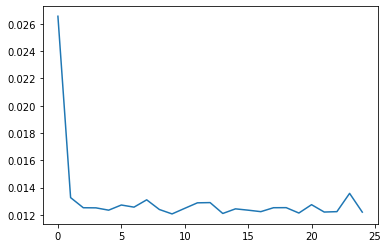

In [27]:
loss_per_epoch = model_sequential_and_FF.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

Se lleva a cabo el forecast de los ultimos 12 meses usando el modelo model_sequential_and_FF previamente definido y entrenado

Se toman los **ULTIMOS** n_input elementos de los **datos de train** y se almacenan en un batch

In [28]:
demanda_electrico_scaled_train_batch = csv_demanda_electrico_scaled_train[-n_input:]
demanda_electrico_scaled_train_batch

array([[0.40929895],
       [0.42016029],
       [0.38425244],
       [0.51049126],
       [0.51049126],
       [0.62604337],
       [0.74135154],
       [0.7836714 ],
       [1.        ],
       [0.83747356],
       [0.72153611],
       [0.80133008],
       [0.64003449],
       [0.67506632],
       [0.65981388],
       [0.48164966],
       [0.52483443],
       [0.58778751],
       [0.7051942 ],
       [0.74375778],
       [0.94934147],
       [0.85129557],
       [0.70352813],
       [0.79378425]])

Se reescala el batch de los datos de train a que tenga la misma forma que los datos con que se entrenó el modelo que fueron  1, input_shape=(n_input, n_features)

In [29]:
demanda_electrico_scaled_train_batch_reshaped = demanda_electrico_scaled_train_batch.reshape(1,n_input, n_features)
demanda_electrico_scaled_train_batch_reshaped

array([[[0.40929895],
        [0.42016029],
        [0.38425244],
        [0.51049126],
        [0.51049126],
        [0.62604337],
        [0.74135154],
        [0.7836714 ],
        [1.        ],
        [0.83747356],
        [0.72153611],
        [0.80133008],
        [0.64003449],
        [0.67506632],
        [0.65981388],
        [0.48164966],
        [0.52483443],
        [0.58778751],
        [0.7051942 ],
        [0.74375778],
        [0.94934147],
        [0.85129557],
        [0.70352813],
        [0.79378425]]])

Intentamos predecir el sigueinte valor dado el primet batch de n_input. Esto equivaldria a predecir el primer valor de los datos de test (PUES SE ESTÁN TOMANDO EXACTAMENTE LOS ULTIMOS VALORES DE LOS DATOS DE TRAIN EN EL BATCH), dados los n_input anteriores (QUE FORMAN BARTE DEL BATCH)

In [30]:
model_sequential_and_FF.predict(demanda_electrico_scaled_train_batch_reshaped)

1/1 [==============================] - 0s 437ms/step


array([[[0.47814348],
        [0.48625225],
        [0.45844644],
        [0.5536908 ],
        [0.5536908 ],
        [0.6399588 ],
        [0.72178155],
        [0.75030607],
        [0.8961094 ],
        [0.78656995],
        [0.70842546],
        [0.7622084 ],
        [0.65040416],
        [0.6762862 ],
        [0.6651663 ],
        [0.5321585 ],
        [0.564399  ],
        [0.61139804],
        [0.6974027 ],
        [0.7234034 ],
        [0.8619673 ],
        [0.79588634],
        [0.69627583],
        [0.75712246]]], dtype=float32)

Y se observa el valor predicho ESCALADO para la demanda de gas en el primer mes o dato de prueba como función de los n datos anteriores y dado el modelo model_sequential_and_FF

In [31]:
model_sequential_and_FF.predict(demanda_electrico_scaled_train_batch_reshaped)[0][-1][0]

1/1 [==============================] - 0s 40ms/step


0.75712246

Y se compara el valor de forecast del modelo model_sequential_and_FF con los datos (ESCALADOS) de test de la demanda de gasd natural en sector eléctrico  

In [33]:
csv_demanda_electrico_scaled_test[0]

array([0.791877])

Ahora ser hará una función que irá formando batch de n_input para ir prediciendo el siguiente valor, tal como se hizo en el entrenamiento del modelo 

In [53]:
n_input = 24
n_features = 1

In [35]:
test_predictions_model_sequential_and_FF = []

first_eval_batch = csv_demanda_electrico_scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(csv_demanda_electrico_scaled_test)):
    
    # get the prediction value for the first batch
    current_pred = model_sequential_and_FF.predict(current_batch)[0][-1][0]
    
    # append the prediction into the array
    test_predictions_model_sequential_and_FF.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[[current_pred]]],axis=1)
    current_batch = current_batch.reshape((1, n_input, n_features))  # Reshape to maintain the 3D shape
    


1/1 [==============================] - 0s 26ms/step


In [36]:
test_predictions_model_sequential_and_FF

[0.75712246,
 0.7324115,
 0.71575576,
 0.70452935,
 0.696953,
 0.69176,
 0.6881544,
 0.68559766,
 0.6837787,
 0.6824847,
 0.68156403,
 0.68090904]

In [37]:
import numpy as np

# Convert the Python list to a NumPy array
test_predictions_model_sequential_and_FF_array = np.array(test_predictions_model_sequential_and_FF)

# Assuming test_predictions is your 1D array
# Reshape it into a 2D array with a single column
test_predictions_model_sequential_and_FF_2d = test_predictions_model_sequential_and_FF_array.reshape(-1, 1)

test_predictions_model_sequential_and_FF_2d

array([[0.75712246],
       [0.7324115 ],
       [0.71575576],
       [0.70452935],
       [0.696953  ],
       [0.69176   ],
       [0.6881544 ],
       [0.68559766],
       [0.6837787 ],
       [0.6824847 ],
       [0.68156403],
       [0.68090904]], dtype=float32)

Se reescalan las prediciones del modelo model_sequential_and_FF a sus "escalas originales"

In [38]:
predictions_model_sequential_and_FF_rescaled = MinMax_scaler.inverse_transform(test_predictions_model_sequential_and_FF_2d)
predictions_model_sequential_and_FF_rescaled

array([[4292.14  ],
       [4203.0005],
       [4142.9185],
       [4102.422 ],
       [4075.0916],
       [4056.3591],
       [4043.3525],
       [4034.1294],
       [4027.568 ],
       [4022.9004],
       [4019.579 ],
       [4017.2163]], dtype=float32)

In [39]:
csv_demanda_electrico_original_test_data['Demanded_Gas'].values

array([4417.51, 4557.36, 4538.89, 3320.75, 3449.8 , 3206.96, 3403.44,
       3350.03, 3498.7 , 3350.97, 3506.42, 3778.37])

Text(0, 0.5, 'Demanda [MMpcd]')

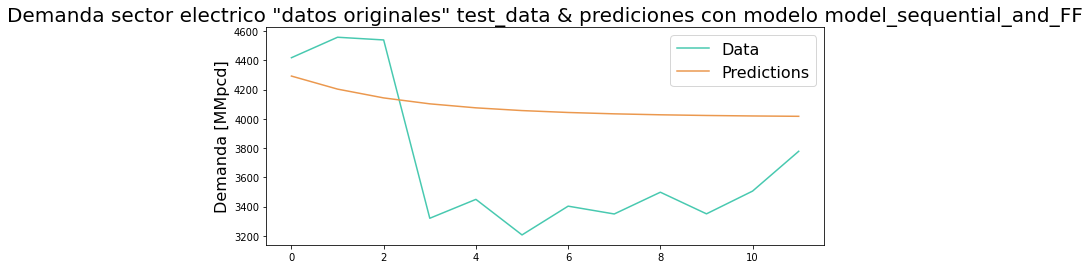

In [40]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(csv_demanda_electrico_original_test_data['Demanded_Gas'].values, color='#48C9B0')
plt.plot(predictions_model_sequential_and_FF_rescaled, color='#EB984E')
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico "datos originales" test_data & prediciones con modelo model_sequential_and_FF', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

In [41]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_sequential_and_FF = mean_absolute_percentage_error(csv_demanda_electrico_original_test_data['Demanded_Gas'].values, predictions_model_sequential_and_FF_rescaled)
RMSE_predictions_model_sequential_and_FF = np.sqrt(mean_squared_error(csv_demanda_electrico_original_test_data['Demanded_Gas'].values, predictions_model_sequential_and_FF_rescaled))

print('MAPE:', MAPE_predictions_model_sequential_and_FF)
print('RMSE:', RMSE_predictions_model_sequential_and_FF)

MAPE: 0.15236245539187954
RMSE: 573.7749888274411
